In [1]:
import sys
import os 
import pandas as pd 
import time
from tqdm import tqdm
import re
ROOT_DIR = os.path.dirname(os.path.abspath('.'))
sys.path.insert(0,'C:/Users/loren/Anaconda3/envs/tf_thesis/lib/site-packages/tweepy')
sys.path.insert(1,'C:/Users/loren/Anaconda3/envs/tf_thesis/lib/site-packages')

In [2]:
import tweepy

In [3]:
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:

path = '../data/Sarc2.0/train-balanced-sarcasm.csv'

In [4]:
with open(path,encoding='utf8') as f:
    data = f.readlines()
    f.close()

In [5]:
df = pd.DataFrame(data)

In [6]:
df['labels'] = data

In [7]:
sarc = pd.read_csv(path)

In [8]:
sarc_1 = sarc[['label', 'comment', 'subreddit']]

In [25]:
sarc  = sarc[~sarc.comment.isnull()]

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

train_x, test_y, y_train, y_test = train_test_split(sarc, sarc.label, test_size=0.92, 
                                                   shuffle = True, stratify = sarc.label, random_state = 2
                                                   )

In [27]:
sarc_1[sarc_1.comment.isnull()]

,label,comment,subreddit


In [28]:
import matplotlib.pyplot as plt

In [233]:
sample_dist = train_x.subreddit.value_counts().reset_index()[:100]

In [234]:
pop_dist = sarc_1.subreddit.value_counts().reset_index()[:100]

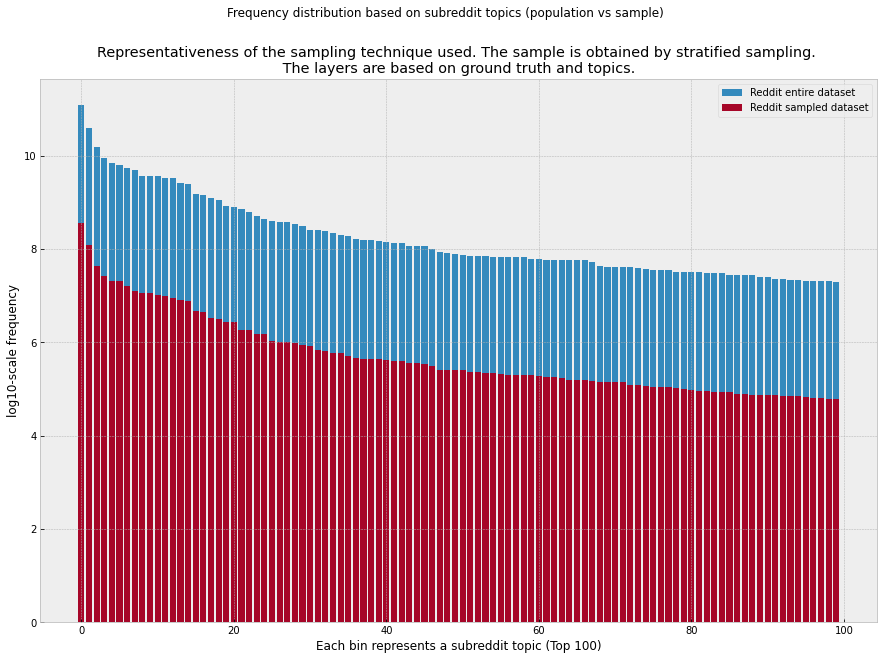

In [236]:
with plt.style.context('bmh'):
    
    plt.figure(figsize=(15,10))
    

    plt.bar(pop_dist.index, np.log(pop_dist.subreddit))
    plt.bar(sample_dist.index, np.log(sample_dist.subreddit))
    plt.suptitle('Frequency distribution based on subreddit topics (population vs sample)')
    plt.title('Representativeness of the sampling technique used. The sample is obtained by stratified sampling. \n The layers are based on ground truth and topics. ')
    plt.ylabel('log10-scale frequency')
    plt.xlabel('Each bin represents a subreddit topic (Top 100)')
    plt.legend(['Reddit entire dataset','Reddit sampled dataset'])
    
    plt.savefig('../Code/Plots/populationvssample_sarc2.0_reddit.png', transparent=True, dpi = 600)

In [30]:
train_x.to_csv('../data/Sarc2.0/train_balanced_sampled_sarc.csv')

In [29]:
train_x[train_x.comment.isnull()]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment


In [36]:
final = pd.concat([df2,df], axis = 0)

In [38]:
final.to_csv('../data/Riloff_twitter/riloff_sarc_train_test.csv')

In [ ]:
tweet_list = []
label_list = []
for text in data:
    text = re.sub(r'\\\'','', text)
    text = re.sub(r'\\', '', text)
    tweet = re.findall(r'\'(.+?)\'',text)
    label = re.findall('sarcasm|NotSarcasm', text)[0]
    
    tweet_list.append(tweet)
    label_list.append(label)

df = pd.DataFrame(tweet_list, columns=['text'])
df['label'] = label_list

In [ ]:
df2 = df

In [ ]:
final_df = pd.concat([df1, df2], axis = 0)

In [ ]:
#final_df.to_csv('../data/BMA_data/Sarcasm_data/final_sarc_bma.csv')

In [ ]:
trainingDataSet = []
for i in tqdm(df_normal['tweet_id']):
    try:
        data = api.get_status(i)
        text = data.text
        trainingDataSet.append([i, text])
            
    except tweepy.TweepError:
        pass 
    time.sleep(0.25)

In [ ]:
df = pd.DataFrame(trainingDataSet, columns=['tweet_id', 'text'])

In [ ]:
test = df.merge(df_normal, left_on='tweet_id', right_on = 'tweet_id')

In [ ]:
all_t = pd.concat([train, test], axis = 0)

In [ ]:
#all_t.to_csv('../data/iSarcasm/isarcasm_final_test_text.csv')